In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-kepler-object-of-interest-koi-dataset/readme.txt
/kaggle/input/nasa-kepler-object-of-interest-koi-dataset/NASA Exoplanet.csv


In [2]:
# Importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/nasa-kepler-object-of-interest-koi-dataset/NASA Exoplanet.csv')


In [4]:
# Display the first few rows to confirm it's loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
      kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1 

In [5]:
# Display column names
print("Column Names:")
print(df.columns)

# Check data types
print("\nData Types:")
print(df.dtypes)

Column Names:
Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

Data Types:
kepid                  int64
kepoi_name            object
kepler_name      

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
kepid                   0
kepoi_name              0
kepler_name          6819
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff            

In [7]:
# Display basic statistics for numerical columns
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
              kepid    koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
count  9.564000e+03  8054.000000    9564.000000    9564.000000    9564.000000   
mean   7.690628e+06     0.480829       0.208595       0.232748       0.197512   
std    2.653459e+06     0.476928       4.767290       0.422605       0.398142   
min    7.574500e+05     0.000000       0.000000       0.000000       0.000000   
25%    5.556034e+06     0.000000       0.000000       0.000000       0.000000   
50%    7.906892e+06     0.334000       0.000000       0.000000       0.000000   
75%    9.873066e+06     0.998000       0.000000       0.000000       0.000000   
max    1.293514e+07     1.000000     465.000000       1.000000       1.000000   

       koi_fpflag_ec     koi_period  koi_period_err1  koi_period_err2  \
count    9564.000000    9564.000000      9110.000000      9110.000000   
mean        0.120033      75.671358         0.002148        -0.002148   
std         0.325018    1334.744

## Data Cleaning

In [8]:
# Drop rows with missing values in specific columns (if needed)
df_cleaned = df.dropna(subset=['koi_period', 'koi_prad', 'koi_teq'])

# Or fill missing values with the median (for numerical columns)
df['koi_period'] = df['koi_period'].fillna(df['koi_period'].median())
df['koi_prad'] = df['koi_prad'].fillna(df['koi_prad'].median())
df['koi_teq'] = df['koi_teq'].fillna(df['koi_teq'].median())

In [9]:
print("\nMissing Values After Filling:")
print(df.isnull().sum())


Missing Values After Filling:
kepid                   0
kepoi_name              0
kepler_name          6819
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad                0
koi_prad_err1         363
koi_prad_err2         363
koi_teq                 0
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_ste

In [10]:
# Fill missing values for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    if df[col].isnull().sum() > 0:  # Check if the column has missing values
        df[col] = df[col].fillna(df[col].median())  # Fill with median

In [11]:
# Fill missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if df[col].isnull().sum() > 0:  # Check if the column has missing values
        df[col] = df[col].fillna("Unknown")  # Fill with "Unknown"

In [12]:
print("Missing Values After Filling:")
print(df.isnull().sum())

Missing Values After Filling:
kepid                   0
kepoi_name              0
kepler_name             0
koi_disposition         0
koi_pdisposition        0
koi_score               0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1         0
koi_period_err2         0
koi_time0bk             0
koi_time0bk_err1        0
koi_time0bk_err2        0
koi_impact              0
koi_impact_err1         0
koi_impact_err2         0
koi_duration            0
koi_duration_err1       0
koi_duration_err2       0
koi_depth               0
koi_depth_err1          0
koi_depth_err2          0
koi_prad                0
koi_prad_err1           0
koi_prad_err2           0
koi_teq                 0
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol               0
koi_insol_err1          0
koi_insol_err2          0
koi_model_snr           0
koi_tce_plnt_num        0
koi_tce_delivname       0
koi_stef

In [13]:
# Drop the columns
df_cleaned = df.drop(columns=['koi_teq_err1', 'koi_teq_err2'])

# Verify the columns are dropped
print("Columns after dropping:")
print(df_cleaned.columns)

Columns after dropping:
Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [14]:
print("Missing Values After Handling:")
print(df_cleaned.isnull().sum())

Missing Values After Handling:
kepid                0
kepoi_name           0
kepler_name          0
koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi

## Exploratory Data Analysis

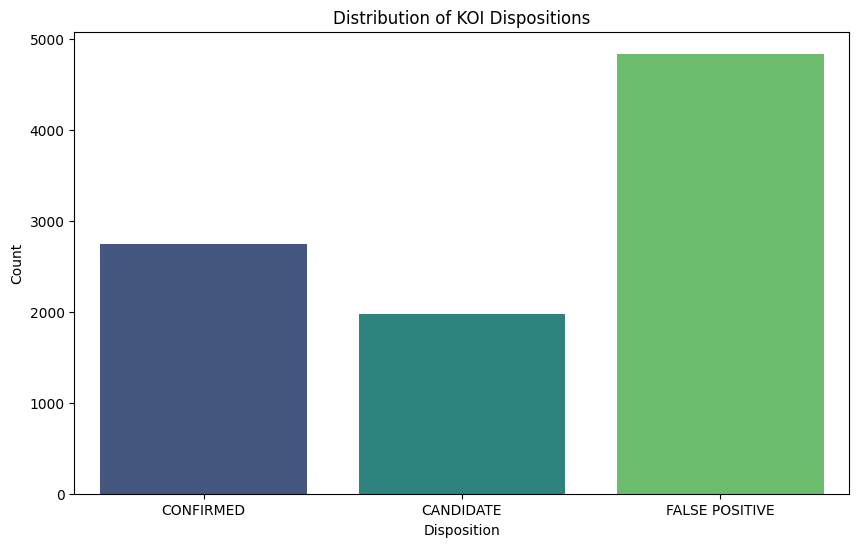

In [15]:
# For visualizing the number of confirm, disposition and false postive candidates.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='koi_disposition', data=df, palette='viridis')
plt.title('Distribution of KOI Dispositions')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


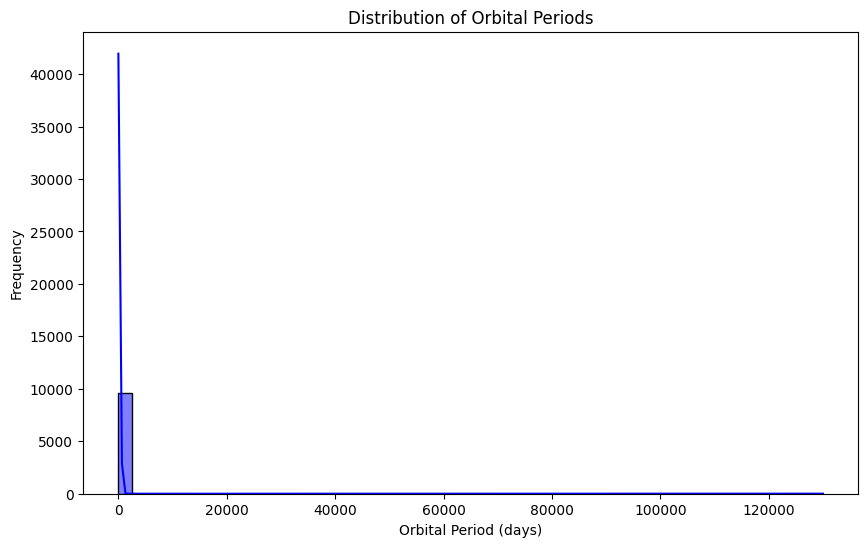

In [16]:
# Distribution of orbital period visualization 
plt.figure(figsize=(10, 6))
sns.histplot(df['koi_period'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Orbital Periods')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Frequency')
plt.show()

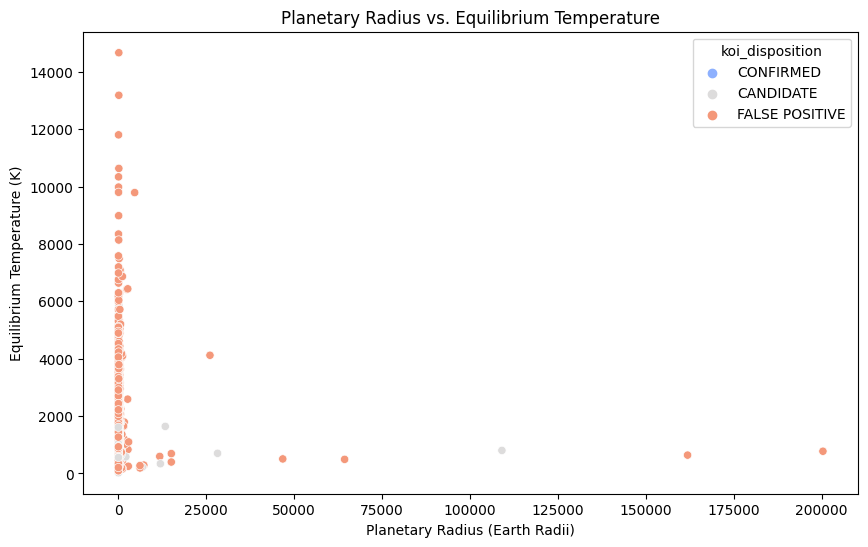

In [17]:
#planetaray radius vs equillibrium temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='koi_prad', y='koi_teq', hue='koi_disposition', data=df, palette='coolwarm')
plt.title('Planetary Radius vs. Equilibrium Temperature')
plt.xlabel('Planetary Radius (Earth Radii)')
plt.ylabel('Equilibrium Temperature (K)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


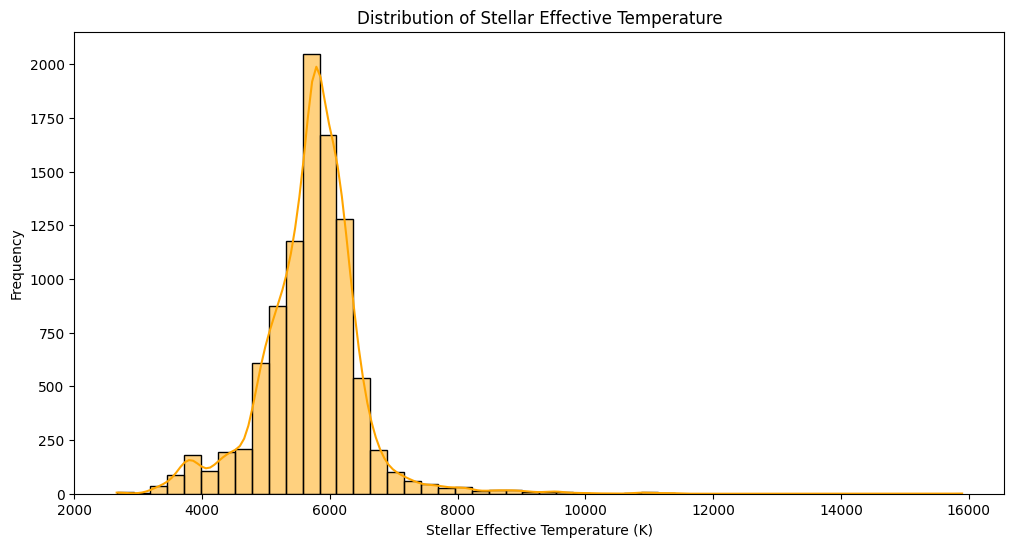

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


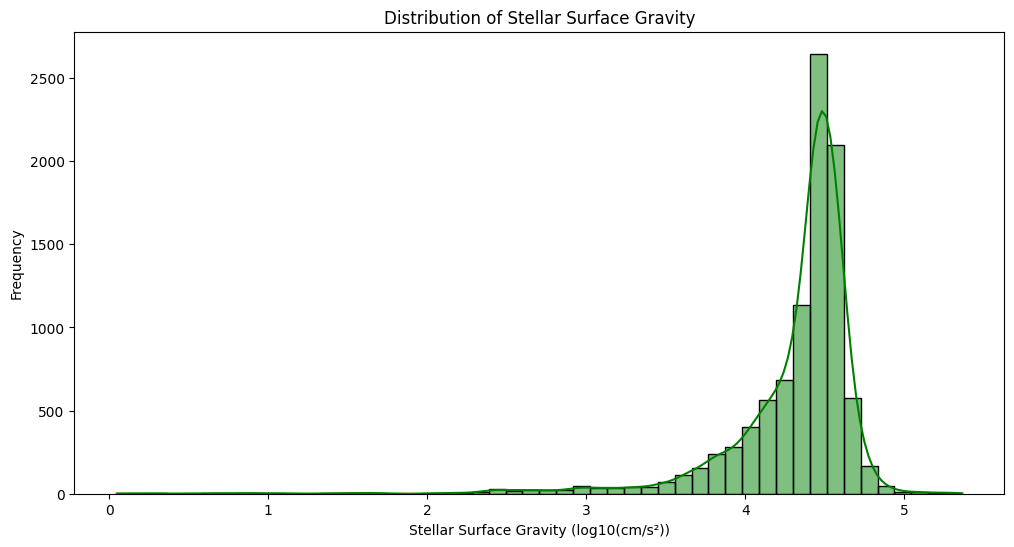

In [18]:
# Stellar Effective Temperature
plt.figure(figsize=(12, 6))
sns.histplot(df['koi_steff'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribution of Stellar Effective Temperature')
plt.xlabel('Stellar Effective Temperature (K)')
plt.ylabel('Frequency')
plt.show()

# Stellar Surface Gravity
plt.figure(figsize=(12, 6))
sns.histplot(df['koi_slogg'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of Stellar Surface Gravity')
plt.xlabel('Stellar Surface Gravity (log10(cm/s²))')
plt.ylabel('Frequency')
plt.show()

## Feature Engineering

In [19]:
df['habitable_zone'] = df['koi_insol'].apply(lambda x: 1 if 0.25 < x < 1.5 else 0)

# Count habitable zone planets
print("\nNumber of planets in the habitable zone:")
print(df['habitable_zone'].value_counts())


Number of planets in the habitable zone:
habitable_zone
0    8977
1     587
Name: count, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode target variable
le = LabelEncoder()
df['koi_disposition_encoded'] = le.fit_transform(df['koi_disposition'])

# Select features and target
features = ['koi_score', 'koi_period', 'koi_prad', 'koi_teq', 'koi_insol']
X = df[features]
y = df['koi_disposition_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print('Accuracy:', accuracy_score(y_test, y_pred))


Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.51      0.42      0.46       406
     CONFIRMED       0.80      0.82      0.81       568
FALSE POSITIVE       0.87      0.92      0.89       939

      accuracy                           0.78      1913
     macro avg       0.73      0.72      0.72      1913
  weighted avg       0.77      0.78      0.78      1913

Accuracy: 0.7846314688970204
